In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('events.csv',low_memory=False)

In [6]:
scr = df.loc[(df['screen_resolution'].isnull())==False]
scr['screen_resolution'].value_counts().head()

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
Name: screen_resolution, dtype: int64

Text(0.5,1,'Visitas según resolucion del dispositivo\n')

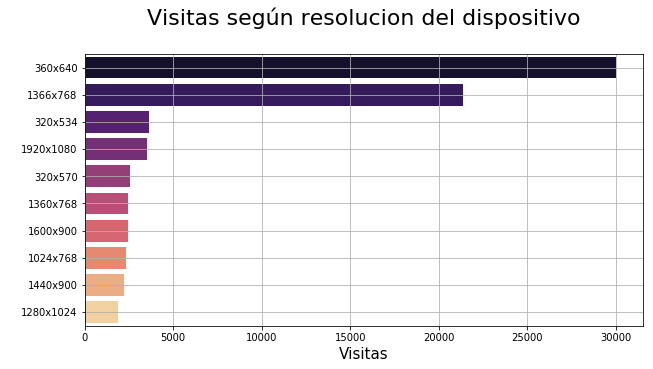

In [59]:
x=scr['screen_resolution'].value_counts()

fig,ax=plt.subplots(figsize=(10,5))
p = x.head(10).to_frame().reset_index()
sns.barplot(data=p,x='screen_resolution',y='index',palette="magma")
plt.grid(True)
plt.xlabel('Visitas',size=15)
plt.ylabel(' ')
plt.title('Visitas según resolucion del dispositivo\n',size=22)


In [31]:
compras = df.loc[df.event=='conversion']
group = scr.groupby('person')

In [32]:
def resolucion(x):
    return x['screen_resolution'].unique()[0]

res = group.apply(resolucion)

In [33]:
res = res.to_frame()

In [34]:
res['compro'] = (res.index).isin(compras['person'])

In [36]:
res.head()

,0,compro
person,,
0004b0a2,360x640,False
0006a21a,360x640,False
000a54b2,1920x1080,False
00184bf9,1366x768,False
0019c395,360x640,False


In [42]:
res.columns=['Resolucion','Compro']

In [43]:
res.head()

,Resolucion,Compro
person,,
0004b0a2,360x640,False
0006a21a,360x640,False
000a54b2,1920x1080,False
00184bf9,1366x768,False
0019c395,360x640,False


In [44]:
res['Resolucion'] = res['Resolucion'].astype(str)

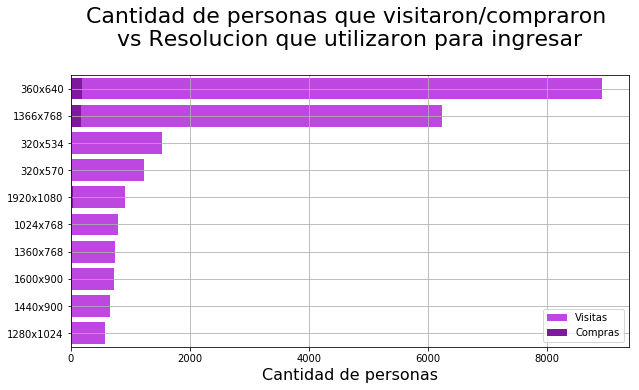

In [61]:
fig,ax = plt.subplots(figsize=(10,5))

g = sns.countplot(data=res,y='Resolucion',order=res['Resolucion'].value_counts().head(10).index,color='#CC2EFA')
g = sns.countplot(data=res.loc[res.Compro==True],y='Resolucion',order=res['Resolucion'].value_counts().head(10).index,color='#8904B1')
plt.legend(['Visitas','Compras'])
g.set_xlabel('Cantidad de personas',size=16)
g.set_ylabel('')
g.grid()
g.set_title('Cantidad de personas que visitaron/compraron \n vs Resolucion que utilizaron para ingresar \n',size=22)
g

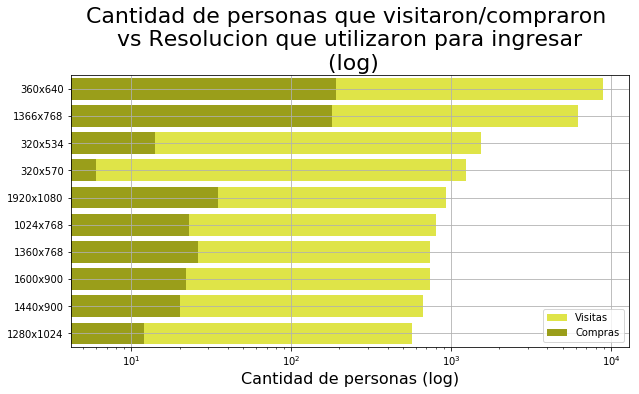

In [63]:
fig,ax = plt.subplots(figsize=(10,5))

g = sns.countplot(data=res,y='Resolucion',order=res['Resolucion'].value_counts().head(10).index,color='#F7FE2E')
g = sns.countplot(data=res.loc[res.Compro==True],y='Resolucion',order=res['Resolucion'].value_counts().head(10).index,color='#AEB404')
plt.xscale('log')
plt.legend(['Visitas','Compras'])
g.set_xlabel('Cantidad de personas (log)', size=16)
g.set_ylabel('')
g.grid()
g.set_title('Cantidad de personas que visitaron/compraron \n vs Resolucion que utilizaron para ingresar \n (log)',size=22)
g